In [67]:
import numpy as np
import pandas as pd 
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.models import Sequential
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

# Import the train and test data

In [68]:
prices_dataset_train =  pd.read_csv('../input/stock-price/SP500_train.csv')
prices_dataset_test =  pd.read_csv('../input/stock-price/SP500_test.csv')
trainingset = prices_dataset_train.iloc[:,5:6].values
testset = prices_dataset_test.iloc[:,5:6].values

# Normalize the data

In [69]:
min_max_scaler = MinMaxScaler(feature_range=(0,1))
scaled_trainingset = min_max_scaler.fit_transform(trainingset)
X_train = []
y_train = []

# Creating the training dataset

#### we use the previous 40 prices in order to forecast the next one.

In [70]:
for i in range(40,1258):
    X_train.append(scaled_trainingset[i-40:i,0]) 
    y_train.append(scaled_trainingset[i,0])

X_train = np.array(X_train)
y_train = np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0],X_train.shape[1],1))

# Building LSTM model

In [71]:
model = Sequential()
model.add(LSTM(units=100, return_sequences=True, input_shape=(X_train.shape[1],1)))
model.add(Dropout(0.5))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.3))
model.add(LSTM(units=50))
model.add(Dropout(0.3))
model.add(Dense(units=1))

# Training the model

In [72]:
model.compile(optimizer='adam', loss='mean_squared_error')
model.fit(X_train, y_train, epochs=100, batch_size=32)

Epoch 1/100
39/39 [==============================] - 11s 116ms/step - loss: 0.0525
Epoch 2/100
39/39 [==============================] - 4s 103ms/step - loss: 0.0086
Epoch 3/100
39/39 [==============================] - 4s 104ms/step - loss: 0.0083
Epoch 4/100
39/39 [==============================] - 4s 102ms/step - loss: 0.0066
Epoch 5/100
39/39 [==============================] - 4s 103ms/step - loss: 0.0082
Epoch 6/100
39/39 [==============================] - 4s 104ms/step - loss: 0.0064
Epoch 7/100
39/39 [==============================] - 4s 103ms/step - loss: 0.0060
Epoch 8/100
39/39 [==============================] - 4s 109ms/step - loss: 0.0062
Epoch 9/100
39/39 [==============================] - 4s 111ms/step - loss: 0.0057
Epoch 10/100
39/39 [==============================] - 4s 104ms/step - loss: 0.0054
Epoch 11/100
39/39 [==============================] - 4s 105ms/step - loss: 0.0056
Epoch 12/100
39/39 [==============================] - 4s 104ms/step - loss: 0.0053
Epoch 13/100

# Testing the algorithm

In [73]:
dataset_total = pd.concat((prices_dataset_train['adj_close'],prices_dataset_test['adj_close']), axis=0) 
inputs = dataset_total[len(dataset_total)-len(prices_dataset_test)-40:].values
inputs = inputs.reshape(-1,1)
inputs = min_max_scaler.transform(inputs)      

X_test = []

In [74]:
for i in range(40,len(prices_dataset_test)+40):
    X_test.append(inputs[i-40:i,0])
    
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0],X_test.shape[1],1))

predictions = model.predict(X_test)
predictions = min_max_scaler.inverse_transform(predictions)
predictions

array([[2263.9077],
       [2260.8706],
       [2261.652 ],
       [2265.3713],
       [2271.1958],
       [2276.3142],
       [2279.4321],
       [2281.1357],
       [2281.2747],
       [2280.9036],
       [2279.8071],
       [2278.88  ],
       [2277.5134],
       [2276.8223],
       [2276.2537],
       [2277.4534],
       [2282.1843],
       [2288.847 ],
       [2295.1677],
       [2298.0718]], dtype=float32)

# Plotting predictions

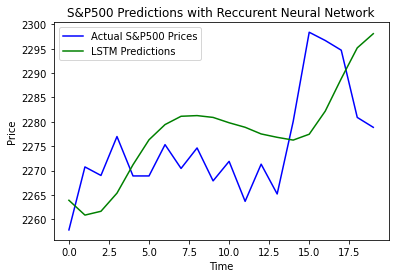

In [75]:
plt.plot(testset, color='blue', label='Actual S&P500 Prices')
plt.plot(predictions, color='green', label='LSTM Predictions')
plt.title('S&P500 Predictions with Reccurent Neural Network')
plt.xlabel('Time')
plt.ylabel('Price')
plt.legend()
plt.show()